# handling-imbalanced-dataset
> ## Techniques
1. Under Sampling
2. Over Sampling
3. SMOTETomek
4. Ensemble Techniques

## Import Required Libraries

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, plot_confusion_matrix, classification_report
from sklearn.model_selection import KFold, GridSearchCV, train_test_split
from sklearn.ensemble import RandomForestClassifier
from imblearn.under_sampling import NearMiss
from collections import Counter
from imblearn.over_sampling import RandomOverSampler
from imblearn.combine import SMOTETomek
from imblearn.ensemble import EasyEnsembleClassifier

## Import the Dataset


In [11]:
df = pd.read_csv('./creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [13]:
df.shape

(182329, 31)

In [23]:
df.dropna(inplace=True)

In [24]:
df.shape

(182328, 31)

In [25]:
df['Class'].value_counts()

0.0    181963
1.0       365
Name: Class, dtype: int64

> ## Extracting Dependent and Independent features

In [26]:
X = df.drop('Class', axis=1)
y = df['Class']

In [52]:
y.value_counts()

0.0    181963
1.0       365
Name: Class, dtype: int64

> ## Splitting the data into Training and Test sets

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

> ### Cross Validation like K-Fold and Hyperparameter Tuning

In [29]:
10.0 ** np.arange(-2, 3)

array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02])

In [33]:
log_clf = LogisticRegression()
grid = {
    'C': 10.0 ** np.arange(-2, 3), 
    'penalty': ['l1', 'l2']
}
# cv = KFold(n_splits=5, shuffle=False, random_state=None)
cv = KFold()

In [34]:
clf = GridSearchCV(log_clf, param_grid=grid, cv=cv, n_jobs=-1, scoring='f1_macro')
clf.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]),
                         'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='f1_macro', verbose=0)

In [35]:
y_pred = clf.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[54563,    28],
       [   33,    75]])

In [41]:
accuracy_score(y_test, y_pred)

0.9988848059379514

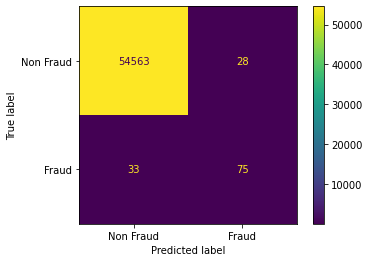

In [38]:
plot_confusion_matrix(clf, X_test, y_test, display_labels=['Non Fraud', 'Fraud'], values_format='d')

In [40]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     54591
         1.0       0.73      0.69      0.71       108

    accuracy                           1.00     54699
   macro avg       0.86      0.85      0.86     54699
weighted avg       1.00      1.00      1.00     54699



In [42]:
clf = RandomForestClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [43]:
confusion_matrix(y_test, y_pred)

array([[54578,    13],
       [   20,    88]])

In [44]:
accuracy_score(y_test, y_pred)

0.9993966982943016

In [46]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     54591
         1.0       0.87      0.81      0.84       108

    accuracy                           1.00     54699
   macro avg       0.94      0.91      0.92     54699
weighted avg       1.00      1.00      1.00     54699



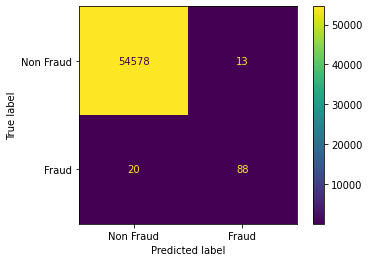

In [45]:
plot_confusion_matrix(clf, X_test, y_test, display_labels=['Non Fraud', 'Fraud'], values_format='d')

In [58]:
len(y[y == 0]) / len(y[y == 1])

498.52876712328765

In [59]:
class_weight = {0:1, 1:400}

In [60]:
clf = RandomForestClassifier(class_weight=class_weight)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [61]:
confusion_matrix(y_test, y_pred)

array([[54577,    14],
       [   27,    81]])

In [62]:
accuracy_score(y_test, y_pred)

0.9992504433353443

In [63]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     54591
         1.0       0.85      0.75      0.80       108

    accuracy                           1.00     54699
   macro avg       0.93      0.87      0.90     54699
weighted avg       1.00      1.00      1.00     54699



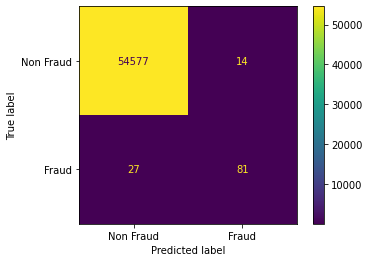

In [64]:
plot_confusion_matrix(clf, X_test, y_test, display_labels=['Non Fraud', 'Fraud'], values_format='d')

> ## 1. Under Sampling
Reduce the weight of the maximum labels

In [68]:
ns = NearMiss(0.8)
X_train_ns, y_train_ns = ns.fit_sample(X_train, y_train)
print(f'The no.of classes before fit {Counter(y_train)}')
print(f'The no.of classes after fit {Counter(y_train_ns)}')

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


The no.of classes before fit Counter({0.0: 127372, 1.0: 257})
The no.of classes after fit Counter({0.0: 321, 1.0: 257})


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [73]:
ns = NearMiss(1)
X_train_ns, y_train_ns = ns.fit_sample(X_train, y_train)
print(f'The no.of classes before fit {Counter(y_train)}')
print(f'The no.of classes after fit {Counter(y_train_ns)}')

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


The no.of classes before fit Counter({0.0: 127372, 1.0: 257})
The no.of classes after fit Counter({0.0: 257, 1.0: 257})


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [79]:
clf = RandomForestClassifier()
clf.fit(X_train_ns, y_train_ns)
y_pred = clf.predict(X_test)

In [80]:
confusion_matrix(y_test, y_pred)

array([[46434,  8157],
       [    8,   100]])

In [82]:
accuracy_score(y_test, y_pred)

0.8507285325143056

In [83]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       1.00      0.85      0.92     54591
         1.0       0.01      0.93      0.02       108

    accuracy                           0.85     54699
   macro avg       0.51      0.89      0.47     54699
weighted avg       1.00      0.85      0.92     54699



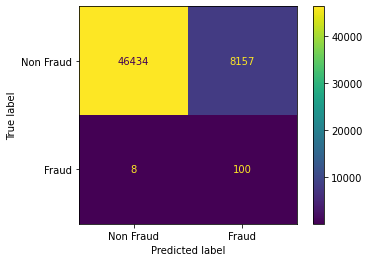

In [84]:
plot_confusion_matrix(clf, X_test, y_test, display_labels=['Non Fraud', 'Fraud'], values_format='d')

> ## 2. Over Sampling

In [91]:
from imblearn.over_sampling import RandomOverSampler
os = RandomOverSampler(0.75)
X_train_os, y_train_os = os.fit_sample(X_train, y_train)
print(f'The no.of classes before fit {Counter(y_train)}')
print(f'The no.of classes after fit {Counter(y_train_os)}')

The no.of classes before fit Counter({0.0: 127372, 1.0: 257})
The no.of classes after fit Counter({0.0: 127372, 1.0: 95529})


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [93]:
clf = RandomForestClassifier()
clf.fit(X_train_os, y_train_os)
y_pred = clf.predict(X_test)

In [94]:
confusion_matrix(y_test, y_pred)

array([[54576,    15],
       [   20,    88]])

In [95]:
accuracy_score(y_test, y_pred)

0.9993601345545623

In [96]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     54591
         1.0       0.85      0.81      0.83       108

    accuracy                           1.00     54699
   macro avg       0.93      0.91      0.92     54699
weighted avg       1.00      1.00      1.00     54699



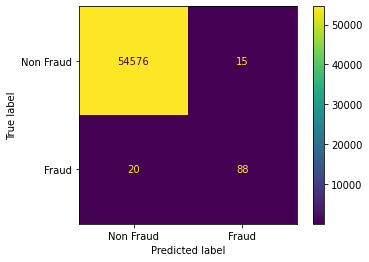

In [97]:
plot_confusion_matrix(clf, X_test, y_test, display_labels=['Non Fraud', 'Fraud'], values_format='d')

> ## 3. SMOTETomek

In [100]:
smote = SMOTETomek(0.75)
X_train_smote, y_train_smote = smote.fit_sample(X_train, y_train)
print(f'The no.of classes before fit {Counter(y_train)}')
print(f'The no.of classes after fit {Counter(y_train_smote)}')

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


The no.of classes before fit Counter({0.0: 127372, 1.0: 257})
The no.of classes after fit Counter({0.0: 126826, 1.0: 94983})


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [101]:
clf = RandomForestClassifier()
clf.fit(X_train_smote, y_train_smote)
y_pred = clf.predict(X_test)

In [102]:
confusion_matrix(y_test, y_pred)

array([[54569,    22],
       [   16,    92]])

In [103]:
accuracy_score(y_test, y_pred)

0.9993052889449533

In [104]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     54591
         1.0       0.81      0.85      0.83       108

    accuracy                           1.00     54699
   macro avg       0.90      0.93      0.91     54699
weighted avg       1.00      1.00      1.00     54699



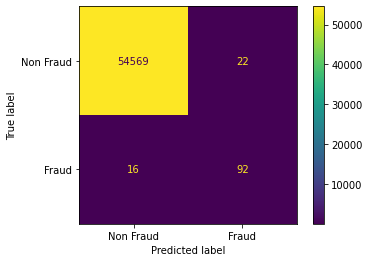

In [105]:
plot_confusion_matrix(clf, X_test, y_test, display_labels=['Non Fraud', 'Fraud'], values_format='d')

> ## 4. Ensemble Techniques

In [107]:
from imblearn.ensemble import EasyEnsembleClassifier
easy = EasyEnsembleClassifier()
easy.fit(X_train, y_train)
y_pred = easy.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarni

In [108]:
confusion_matrix(y_test, y_pred)

array([[53028,  1563],
       [    8,   100]])

In [109]:
accuracy_score(y_test, y_pred)

0.9712791824347794

In [110]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       1.00      0.97      0.99     54591
         1.0       0.06      0.93      0.11       108

    accuracy                           0.97     54699
   macro avg       0.53      0.95      0.55     54699
weighted avg       1.00      0.97      0.98     54699



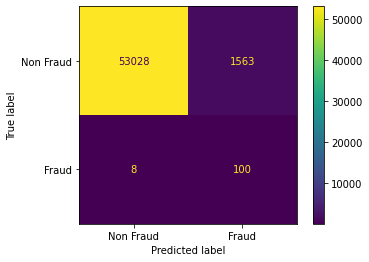

In [112]:
plot_confusion_matrix(easy, X_test, y_test, display_labels=['Non Fraud', 'Fraud'], values_format='d')